In [1]:
import numpy as np

# 示例代码：加载数据后打印形状
image_file = '/home/hpc/iwbi/iwbi105h/seg/data/Org_test_data.npy'
mask_file = '/home/hpc/iwbi/iwbi105h/seg/data/GT_test_data.npy'

# 使用 numpy 加载 .npy 文件
image_data = np.load(image_file)
mask_data = np.load(mask_file)

print("Image data shape:", image_data.shape)
print("Mask data shape:", mask_data.shape)

Image data shape: (500, 256, 256, 1)
Mask data shape: (500, 256, 256, 4)


Hausdorff distance CSF: 7.937253933193772
Hausdorff distance GM: 8.602325267042627
Hausdorff distance WM: 6.855654600401044


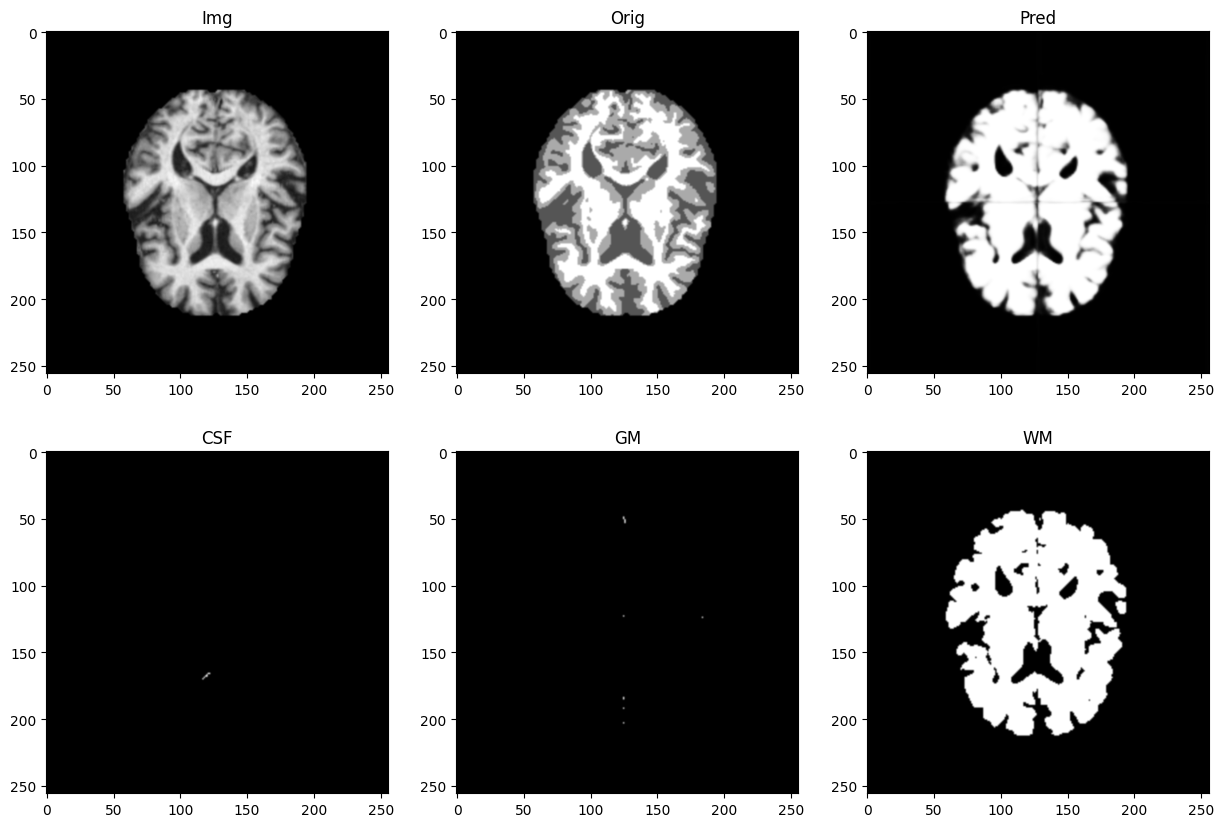

MSE: 0.03410996226566581


In [10]:
from extractslices import extractslices

#from Unet import Attention_U_Net
from Unet import Unet
from keras.callbacks import EarlyStopping
from displayresults import displayresults
from displayimages import displayimages
import matplotlib.pyplot as plt
from extractpatches import extractpatches
from tensorflow.keras.optimizers import Adam, RMSprop


import numpy as np 
import scipy.spatial.distance as ssd 

imgs_train_array = np.load(r'/home/hpc/iwbi/iwbi105h/seg/Org_train_data.npy')
mask_train_array = np.load(r'/home/hpc/iwbi/iwbi105h/seg/GT_train_data.npy')
image_test_array = np.load(r'/home/hpc/iwbi/iwbi105h/seg/Org_test_data.npy')
mask_test_array = np.load(r'/home/hpc/iwbi/iwbi105h/seg/GT_test_data.npy')

windowsize_r = 128
windowsize_c = 128
num_patch = 4

masks_pred = np.load(r'/home/hpc/iwbi/iwbi105h/seg/mask_pred.npy')
(imgs_train, mask_train, image_test, mask_test) = extractpatches(imgs_train_array, mask_train_array, image_test_array, mask_test_array, windowsize_r, windowsize_c, num_patch)
gm_dsc, gm_jc, wm_dsc, wm_jc,csf_dsc, csf_jc,pred_csf,pred_gm,pred_wm,orig_csf,orig_gm,orig_wm = displayresults(masks_pred,mask_test)


subject_no = 47
slice_no = 4
displayimages(masks_pred,mask_test,subject_no,slice_no,pred_csf,pred_gm,pred_wm,orig_csf,orig_gm,orig_wm,image_test)
MSE = np.square(np.subtract(mask_test, masks_pred)).mean()
print("MSE:",MSE)